In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [0]:
def gen_hypo(alpha = 0.5,beta = 0.3,n = 100,t = 0, plot = True):
    
    """Function that depicts distributions in and
       calculates statistics in hypothesis testing
    
       args:
        alpha(float): Beta distribution 1st parameter
        beta(float): Beta distribution 2nd parameter
        n(int): number of samples
        t(float): testing value of hypothesis
        plot(bool): plots the distributions if True
        
       return()dict:
        data, std, sample mean, real mean, test value, test statistic"""
    
    X = np.random.beta(alpha,beta, size = n)
    X_min = int(np.min(X))
    X_max = int(np.max(X))+1
    X_std = np.std(X,ddof= 1)
    X_mean = np.mean(X)
    z = np.sqrt(n)*(X_mean-t)/X_std
    
    if plot == True:
        plt.figure(figsize = (16,8))
        x_axis = [i*(X_max-X_min)/2000+X_min for i in range(2000)]
        data_distrib = stats.beta.pdf(x_axis, alpha,beta)
        mean_distrib = stats.norm.pdf(x_axis, loc = t, scale = X_std/np.sqrt(n))
        plt.plot(x_axis,data_distrib,'b--', label = 'pdf of sample', alpha = 0.5)
        plt.plot(x_axis,mean_distrib,'black', label = 'distribution of mean')
        plt.plot([t,t],[0,max(mean_distrib)],'black', linewidth = 3)
        plt.plot([X_mean,X_mean],[0,stats.norm.pdf(t, loc = X_mean,
                                                   scale = X_std/np.sqrt(n))],
                 'r', linewidth = 3,label = 'sample mean')
        plt.hist(X, bins = max(20,min(40,int(n/4))),color = 'b',
                 density = True, label = 'distribution of sample')
        plt.ylim(-0.1,max(mean_distrib)+1)
        plt.xlim(0,1)
        plt.legend()
        plt.show()
        
    return {'data':X,
           'std': X_std,
           'sample_mean':X_mean,
           'real_mean': alpha/(alpha+beta),
           'test_value': t,
           'z': z}

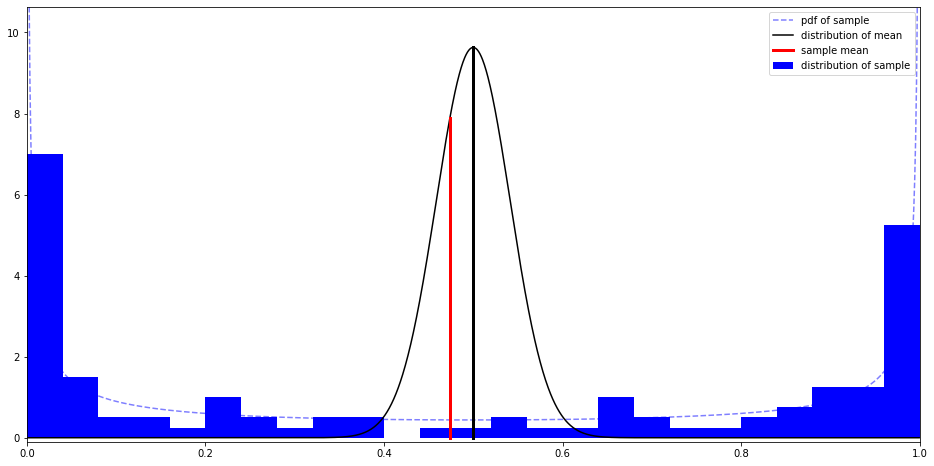

[('sample_mean', 0.47387118524745153),
 ('real_mean', 0.5),
 ('test_value', 0.5),
 ('z', -0.630790361515424)]

In [3]:
hypo = gen_hypo(alpha = 0.3, beta = 0.3,
                n = 100, t = 0.5)
[(x,hypo[x]) for x in ['sample_mean','real_mean','test_value','z']]